In [144]:
import numpy as np
import pandas as pd

In [145]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [146]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [147]:
df.shape

(5572, 5)

## Data Cleaning

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [149]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2557,spam,This message is brought to you by GMW Ltd. and...,NaN,NaN,NaN
3376,ham,Yup. Wun believe wat? U really neva c e msg i ...,NaN,NaN,NaN
1841,ham,I am in your office na.,NaN,NaN,NaN
1013,ham,Just buy a pizza. Meat lovers or supreme. U ge...,NaN,NaN,NaN
3202,ham,Haha... Yup hopefully we will lose a few kg b...,NaN,NaN,NaN


In [150]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()  # This will work fine

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
# Renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [152]:
# encoding the target column

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
1606,0,Ok no prob... I'll come after lunch then...
5183,0,"Fuuuuck I need to stop sleepin, sup"
4832,1,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."
2651,0,"Text me when you get off, don't call, my phone..."
1722,0,Thought praps you meant another one. Goodo! I'...


In [153]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [154]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [155]:
# duplicate values
df.duplicated().sum()

403

In [156]:
df = df.drop_duplicates(keep='first')

In [157]:
df.duplicated().sum()

0

In [158]:
df.shape

(5169, 2)

## EDA

In [159]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [160]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

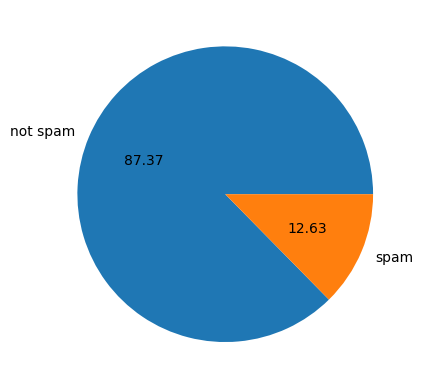

In [161]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')
plt.show()

Data is imbalance

In [162]:
import nltk

In [163]:
# Number of charectors in the text

df["total_chars"] = df['text'].apply(len)

In [164]:
df.head()

,target,text,total_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [165]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [166]:
# Number of words in the text

df['total_words'] = df['text'].apply((lambda x: len(nltk.word_tokenize(x))))

In [167]:
df.head()

,target,text,total_chars,total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [168]:
# total number of sentences
df['total_sentences'] =df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [169]:
df.head()

,target,text,total_chars,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [170]:
df[['total_chars', 'total_words', 'total_sentences']].describe()

,total_chars,total_words,total_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [171]:
# ham msgs
df[df['target'] == 0][['total_chars', 'total_words', 'total_sentences']].describe()

,total_chars,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [172]:
# spam msgs
df[df['target'] == 1][['total_chars', 'total_words', 'total_sentences']].describe()

,total_chars,total_words,total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [173]:
import seaborn as sns

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

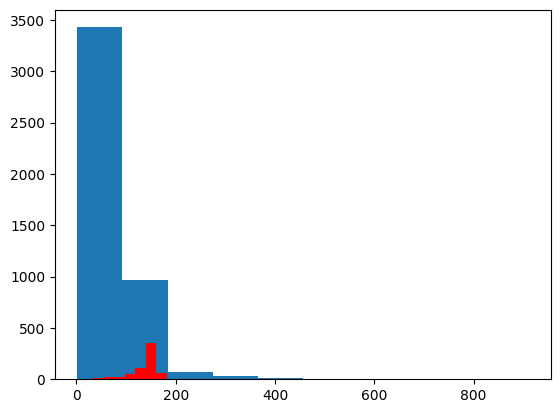

In [174]:
plt.hist(df[df['target'] == 0] ['total_chars'])
plt.hist(df[df['target'] == 1] ['total_chars'], color='red')

<Axes: xlabel='total_chars', ylabel='Count'>

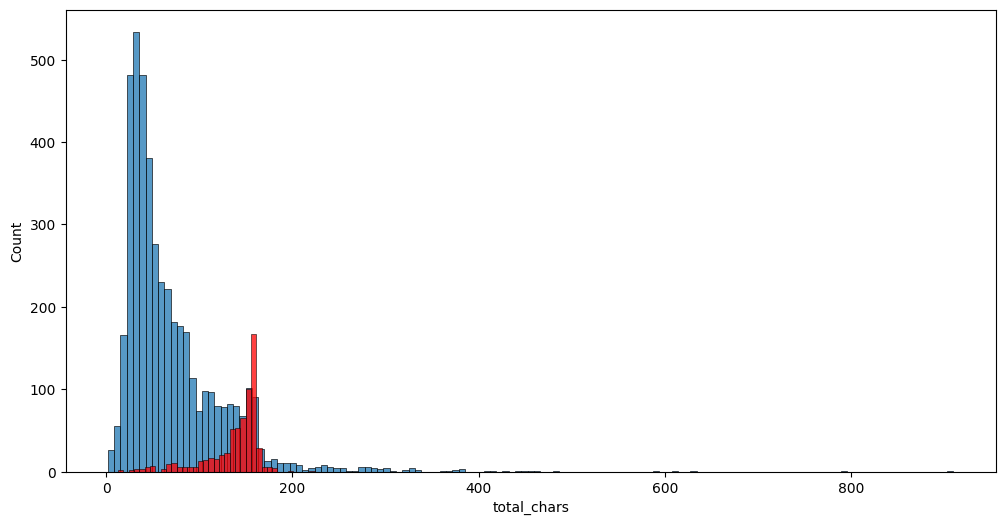

In [175]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['total_chars'])
sns.histplot(df[df['target'] == 1] ['total_chars'], color='red')

<Axes: xlabel='total_words', ylabel='Count'>

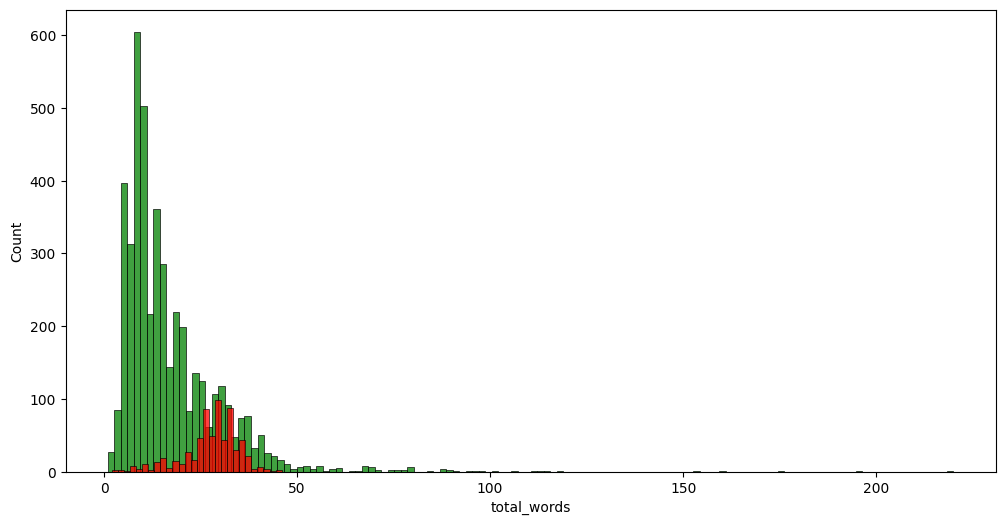

In [176]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['total_words'], color='green')
sns.histplot(df[df['target'] == 1] ['total_words'], color='red')

<Axes: xlabel='total_sentences', ylabel='Count'>

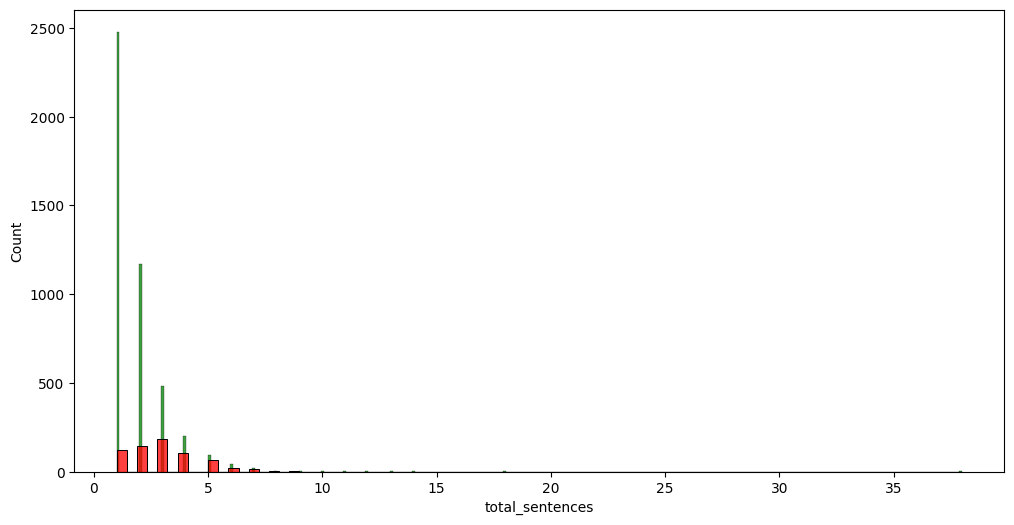

In [177]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['total_sentences'], color='green')
sns.histplot(df[df['target'] == 1] ['total_sentences'], color='red')

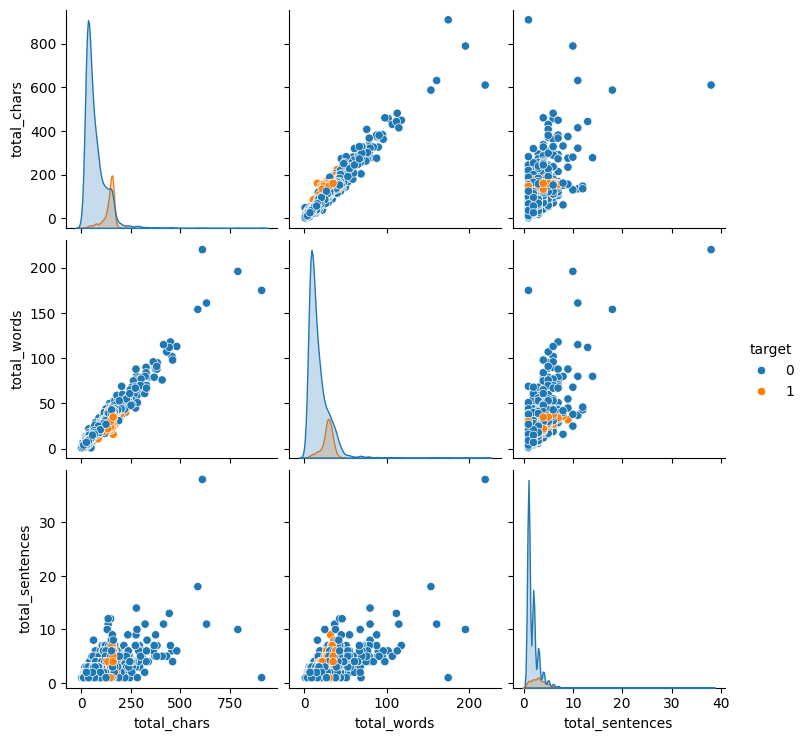

In [178]:
sns.pairplot(df, hue='target')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target           5169 non-null   int32 
 1   text             5169 non-null   object
 2   total_chars      5169 non-null   int64 
 3   total_words      5169 non-null   int64 
 4   total_sentences  5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [181]:
df.corr(numeric_only=True)

,target,total_chars,total_words,total_sentences
target,1.000000,0.384717,0.262912,0.263939
total_chars,0.384717,1.000000,0.965760,0.624139
total_words,0.262912,0.965760,1.000000,0.679971
total_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

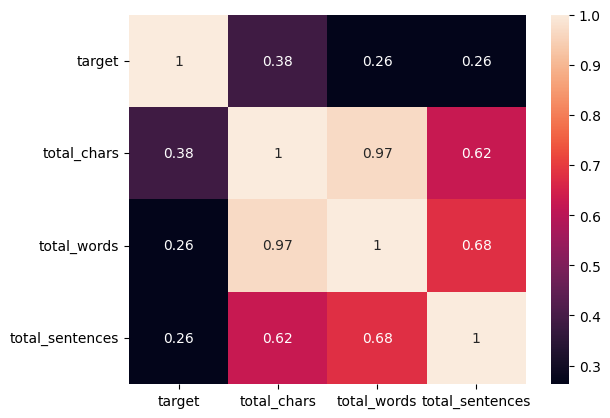

In [182]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

the data has multi colinarity 

## Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
def text_transform(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text) # remove whitespace (\W+ means anything that is not a letter, number, or underscore)
    text = re.sub(r'\s+', ' ', text) # Remove Extra Spaces
    text = [word for word in text.split() if word not in stop_words]
    text = [stemmer.stem(word) for word in text]
    return ' '.join(text)  # Added space between words

In [188]:
df['transformed_text'] = df['text'].apply(text_transform)

In [189]:
df.head()

,target,text,total_chars,total_words,total_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [191]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [193]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [196]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

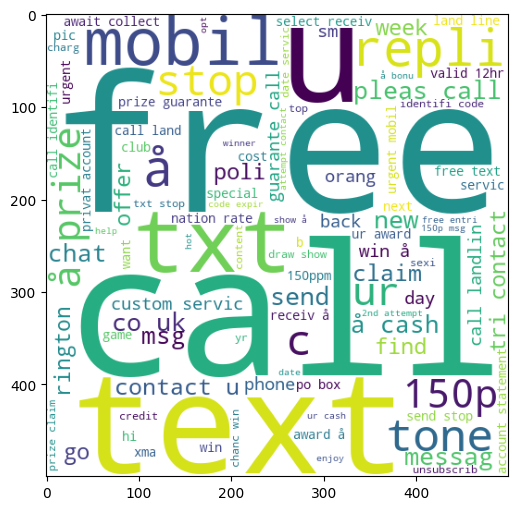

In [198]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [199]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

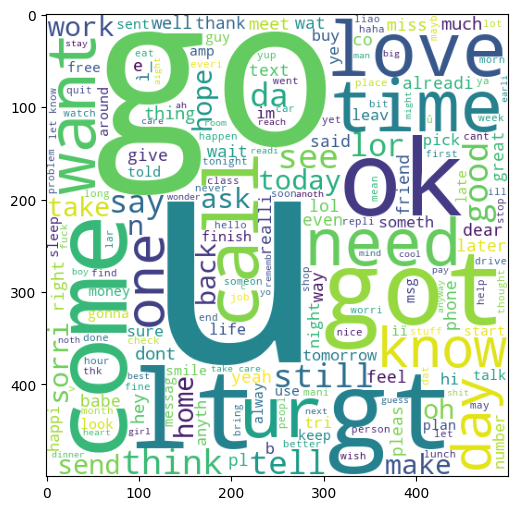

In [200]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [208]:
spam_store = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for words in msg.split():
        spam_store.append(words)

In [210]:
len(spam_store)

11996

In [214]:
from collections import Counter
pd.DataFrame(Counter(spam_store).most_common(30))

,0,1
0,call,327
1,å,247
2,free,195
3,2,184
4,u,147
5,txt,145
6,text,128
7,ur,119
8,mobil,118
9,4,114


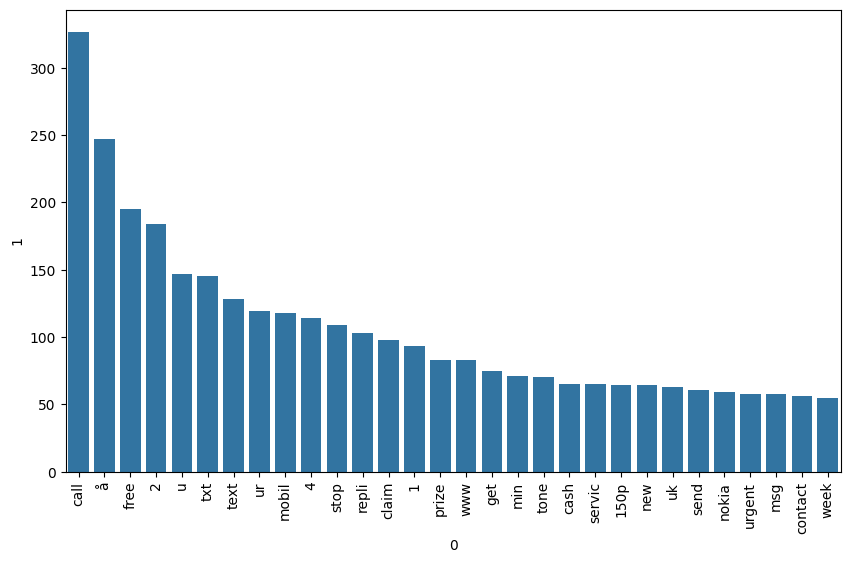

In [222]:
plt.figure(figsize=(10,6))
sns.barplot(x=pd.DataFrame(Counter(spam_store).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_store).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_store = []

for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for words in msg.split():
        ham_store.append(words)


In [229]:
len(ham_store)

36510

In [231]:
pd.DataFrame(Counter(ham_store).most_common(30))

,0,1
0,u,915
1,go,405
2,get,354
3,2,302
4,gt,288
5,lt,287
6,come,276
7,ok,255
8,call,240
9,like,236


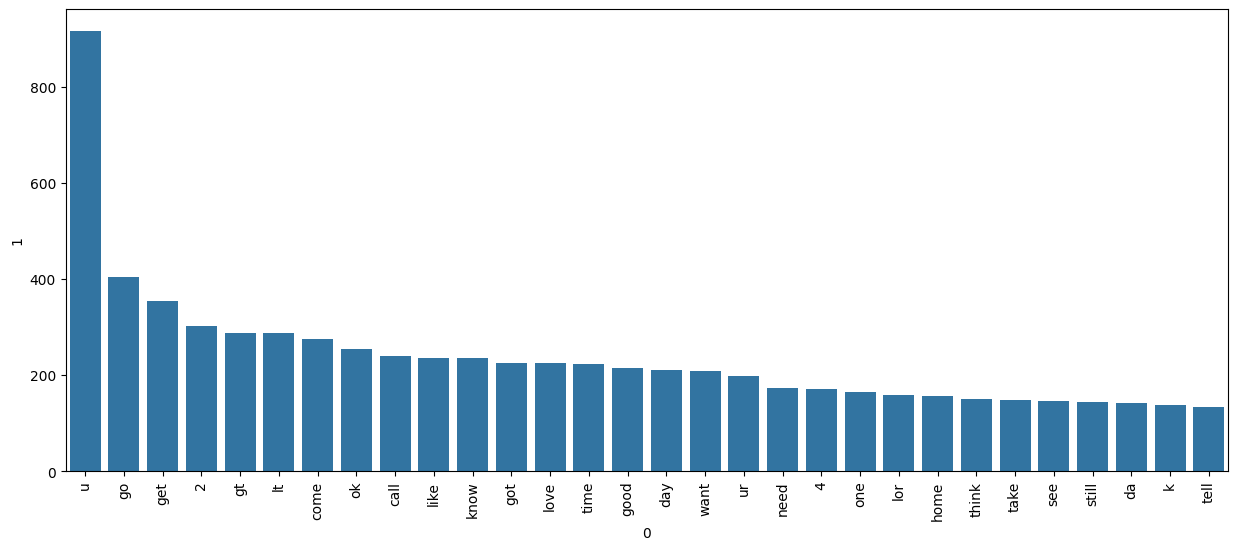

In [236]:
plt.figure(figsize=(15,6))
sns.barplot(x =pd.DataFrame(Counter(ham_store).most_common(30))[0], 
            y = pd.DataFrame(Counter(ham_store).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

## Model Building

As it is the preception that naive base model is good for textual data so we will use that.

In [265]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

In [266]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [267]:
X.shape

(5169, 3000)

In [268]:
y = df['target'].values

In [269]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [272]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [273]:
model = gnb.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)

accuracy, conf_matrix, precision


(0.8694390715667312,
 array([[772, 117],
        [ 18, 127]], dtype=int64),
 0.5204918032786885)

In [274]:
model = bnb.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)

accuracy, conf_matrix, precision


(0.9777562862669246,
 array([[886,   3],
        [ 20, 125]], dtype=int64),
 0.9765625)

In [275]:
model = mnb.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)

accuracy, conf_matrix, precision


(0.9787234042553191,
 array([[877,  12],
        [ 10, 135]], dtype=int64),
 0.9183673469387755)

as ```BernoulliNB``` is giving the high accuracy with high precision so we will go with it.

In [278]:
import pickle

pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))